Saving Housing.csv to Housing (1).csv
Simple LR - Intercept: 2329244.9134951504
Simple LR - Coefficient: 475.2678457111462
Simple LR - R2 Score: 0.3067292122216637
Simple LR - MSE: 1997672371756.0867


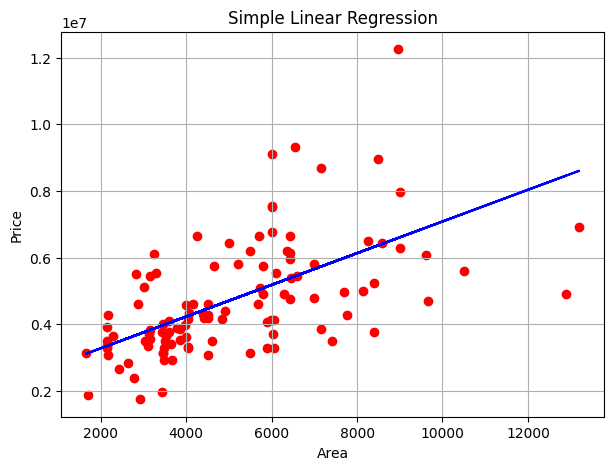

Multiple LR - Intercept: -552754.0367013635
area : 289.89
bedrooms : 151747.99
bathrooms : 1021007.31
stories : 458318.54
parking : 231962.89
mainroad : 577636.85
guestroom : 496488.61
basement : 484441.19
hotwaterheating : 1180665.43
airconditioning : 901082.7
Multiple LR - R2 Score: 0.6516326816603903
Multiple LR - MSE: 1003826757651.1642


,Actual,Predicted
0,4585000,3.809293e+06
1,6083000,5.696559e+06
2,4007500,4.473620e+06
3,6930000,7.531319e+06
4,2940000,3.052879e+06


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})
df = df.dropna()

X_simple = df[['area']]
y_simple = df['price']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y_simple, test_size=0.2, random_state=0)
model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)
y_pred_s = model_simple.predict(X_test_s)
print("Simple LR - Intercept:", model_simple.intercept_)
print("Simple LR - Coefficient:", model_simple.coef_[0])
print("Simple LR - R2 Score:", r2_score(y_test_s, y_pred_s))
print("Simple LR - MSE:", mean_squared_error(y_test_s, y_pred_s))
plt.figure(figsize=(7,5))
plt.scatter(X_test_s, y_test_s, color='red')
plt.plot(X_test_s, y_pred_s, color='blue')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression')
plt.grid(True)
plt.show()

features = ['area','bedrooms','bathrooms','stories','parking','mainroad','guestroom','basement','hotwaterheating','airconditioning']
X_multi = df[features]
y_multi = df['price']
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=0)
model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)
y_pred_m = model_multi.predict(X_test_m)
print("Multiple LR - Intercept:", model_multi.intercept_)
for f, c in zip(features, model_multi.coef_):
    print(f, ":", round(c, 2))
print("Multiple LR - R2 Score:", r2_score(y_test_m, y_pred_m))
print("Multiple LR - MSE:", mean_squared_error(y_test_m, y_pred_m))
comp = pd.DataFrame({'Actual': y_test_m.values, 'Predicted': y_pred_m})
display(comp.head())

